(ch:twoD-data)=
# 2차원 데이터

**기본 설정**

`numpy`와 `pandas` 라이브러리를 각각 `np`와 `pd`로 불러온다.

In [1]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [2]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [3]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [4]:
pd.set_option('display.precision', 6)

## 선형 상관관계

영어를 잘하는 학생은 수학도 잘하는가? 그 반대인가? 아니면 아무런 상관관계도 없는가? 이 장에서는 학생들의 영어 점수와 수학 점수에 해당하는 2차원 데이터로부터 두 점수간의 상관관계를 분석하는 방법을 소개한다.

상관관계는 선형 상관관계와 비선형 상관관계로 나뉜다. 선형 상관관계는 하나의 데이터 값이 증가함에 따라 다른 데이터 값이 일차함수로 단조증가(양의 상관관계) 또는 단조감소(음의 상관관계)를 의미하고, 비선형 상관관계는 일차함수보다 복잡한 함수로 나타나는 경우를 말한다. 2차원 데이터를 다루는 대부분의 경우, 선형 상관관계 여부를 분석하며, 이를 평가하기 위한 척도로서 공분산<font size='2'>covariance</font>과 상관계수<font size='2'>correlation coefficient</font>를 사용한다.

**시각화 라이브러리 및 데이터 준비하기**

기본설정은 앞 장들과 동일하며, 여기서는 추가로 데이터 시각화를 위해 필요한 라이브러리 `matplotlib.pyplot`를 `plt`라는 별칭으로 불러온다.

In [5]:
import matplotlib.pyplot as plt

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/DataSci/tree/master/data)를 지정한다.

In [6]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

50명의 영어와 수학 점수를 담고 있는 csv 파일을 데이터프레임으로 불러온다.
이때 학생번호를 인덱스로 지정한다.

In [7]:
df = pd.read_csv(data_url+'ch02_scores_em.csv',
                 index_col='student number')
df

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76
6,48,60
7,65,81
8,49,66
9,65,78


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 1 to 50
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   english      50 non-null     int64
 1   mathematics  50 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


**10개 데이터 샘플 추출**

이해를 쉽게 하기 위해, 처음 10개의 샘플만 이용해 상관관계를 분석해보자.

먼저 학생들의 이름을 활용할 수 있도록
처음 열 명의 이름 A, B, C, …, J를 인덱스로 지정하고, 인덱스 이름을 student로 지정한다.
두 가지 방식이 있는데, 먼저 넘파이 어레이를 활용하는 방법이다.

방식 1: 넘파이 어레이 활용

각각의 특성에서 처음 10개 데이터만 추출해서 어레이로 지정한다.

In [9]:
eng_scores = np.array(df['english'])[:10]
math_scores = np.array(df['mathematics'])[:10]

추출된 두 개의 데이터에 대해 각각 english, mathematics 특성명과 함께
각 데이터 샘플의 인덱스를 알파벳 A부터 J로 지정한 새로운 데이터프레임을 생성한다.
또한 인덱스의 이름을 student로 지정한다.

In [10]:
scores_df = pd.DataFrame({'english':eng_scores,
                          'mathematics':math_scores},
                         index=pd.Index(list('ABCDEFGHIJ'),
                                        name='student'))

In [11]:
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


방식 2: 데이터프레임 슬라이싱 활용

처음 10개의 데이터 샘플을 데이터프레임의 슬라이싱을 이용하여 추출할 수 있다. 단, 원본은 그대로 두고 슬라이싱한 결과의 사본을 반환받는다. 데이터프레임의 슬라이싱은
{numref}`%s장 <ch-numpy-array>`에서 소개한
뷰<font size='2'>view</font> 기능을 사용하는데,
뷰 방식으로 생성된 데이터프레임을 수정하면 원본 데이터프레임도 함께 수정된다. 따라서 데이터프레임의 슬라이싱을 이용할 때는 일반적으로 사본을 만드는 것이 안전하다.

In [12]:
scores_df = df.iloc[:10].copy()
scores_df

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76
6,48,60
7,65,81
8,49,66
9,65,78


데이터프레임의 `index` 속성에 데이터셋의 크기에 해당하는 리스트를 지정하는
방식으로 인덱스를 변경한다.

In [13]:
scores_df.index = list('ABCDEFGHIJ')

데이터프레임의 `index` 속성이 가리키는 `Index` 객체의 `name` 속성을 `student`로 지정한다.

In [14]:
scores_df.index.name = 'student'

이전 방식과 동일한 결과를 얻는다.

In [15]:
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


### 산점도

먼저 두 데이터 사이의 상관관계 여부를 시각적으로 확인하기 위해 산점도<font size='2'>scatter plot</font>를 그려본다.
산점도는 `matplotlib.pyplot` 라이브러리에 포함된 `scatter()` 함수를 이용하면 된다.


아래 코드는 알파벳 A부터 J까지 10명 학생의 영어 점수와 수학 점수를 산점도로 그려준다. x축이 영어 점수, y축이 수학 점수이다.
`matplotlib.pyplot` 라이브러리에 포함된 `annotate()` 함수는 그래프의 특정 좌표에 지정된 레이블을 표기하는 함수인데, 최소한 아래 두 종류의 인자를 지정해야 한다.

- 첫째 인자: 표기하고자 하는 문자열
- 둘째 인자: 표기하고자 하는 위치. (x좌표, y좌표)의 튜플.

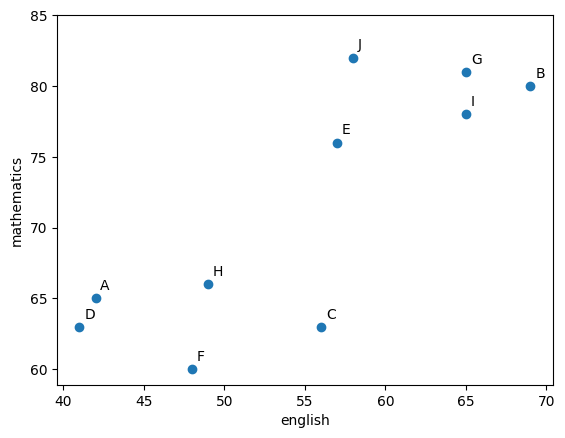

In [16]:
plt.scatter(eng_scores, math_scores)
plt.xlabel('english')
plt.ylabel('mathematics')

    # 눈금 범위 지정
plt.xticks(range(40, 75, 5))
plt.yticks(range(60, 90, 5))

# 학생 데이터 각각에 이름 추가
for i, name in enumerate(scores_df.index):
    plt.annotate(name, (eng_scores[i]+0.3, math_scores[i]+0.6))

plt.show()

위 산점도는 영어 점수가 높아질수록 수학 점수도 올라가는 경향이 있음을 보여준다.
즉 영어 점수와 수학 점수는 양의 상관관계를 갖는다고 추측할 수 있다.

이제 상관관계를 수치화한 두 가지 척도, 공분산<font size='2'>covariance</font>과 상관계수<font size='2'>correlation coefficient</font>를 통해 살펴보자. 먼저 공분산을 소개한다.

### 공분산

[6장](https://codingalzi.github.io/DataSci/oneD_data.html#id5)에서 다룬 분산<font size='2'>variance</font>은 한 종류의 데이터 $X=\{ x_1,
\cdots, x_n \}$에 대해 샘플값들의 편차의 제곱의 평균값이다. 아래 식과 같이 계산되며, 샘플값들이 평균으로부터 떨어져있는 정도를 나타내는 양의 측정치이다.

$$
S_X^2 = \frac 1 n \sum_{i=1}^{n} (x_i - \bar x)^2 = \frac 1 n \left\{(x_1 - \bar x)^2 + (x_2 - \bar x)^2 + \cdots + (x_n - \bar x)^2 \right \}
$$


공분산<font size='2'>covariance</font>은 두 종류의 데이터 $X=\{ x_1, \cdots, x_n \}$와 $Y=\{ y_1,
\cdots, y_n \}$에 대해 다음과 같이 정의하며 $S_{XY}$로 표기하자.

$$
\begin{align*}
S_{XY} & = \frac 1 n \sum_{i=1}^{n} (x_i - \bar x)(y_i - \bar y) \\
&= \frac 1 n \left\{ (x_1 - \bar x)(y_1 - \bar y) + (x_2 - \bar x)(y_2 - \bar y) + \cdots + (x_n - \bar x)(y_n - \bar y) \right\}
\end{align*}
$$

위의 두 식으로부터 알 수 있는 사실은, 분산과 달리 공분산은 음수가 나올 수 있다는 것이다.
분산은 한 종류의 데이터에 대해 편차의 제곱의 평균이므로 항상 양의 값을 갖는다. 하지만 공분산은 두 종류의 데이터에 대해 편차의 곱의 평균인데, 곱해지는 편차의 부호가 다른 항들은 음수가 되므로 평균 또한 음수가 될 수 있다.


예를 들어, 아래 그림은 학생 C, E, H 에 대해, 영어 점수와 수학 점수의 편차를 각각 가로와 세로의 길이로 표현한 세 개의 직사각형을 보여준다. 이 그림에서 학생 C의 두 점수의 편차의 곱은 음의 값을 갖는다. 영어 점수의 편차는 양수, 수학 점수의 편차는 음수이기 때문이다. 학생 E는 두 점수의 편차가 모두 양수이므로 편차의 곱도 양수가 되는 경우이고, 학생 H는 두 점수의 편차가 모두 음수여서 편차의 곱이 양수가 되는 경우이다.

<p><div align="center"><img src="https://github.com/codingalzi/DataSci/blob/master/jupyter-book/images/ch03/img-3-2.jpg?raw=true" style="width:500px"></div></p>

참고로 10명 학생의 영어, 수학 평균값은 각각 55.0과 71.4다.

아래 코드는 위 수식을 계산하는 데 필요한 값들을 모아놓은 데이터프레임을 생성한다. 특성명에 사용된 dev는 편차deviation의 줄임말이다.

In [17]:
scores_df.mean()

english        55.0
mathematics    71.4
dtype: float64

In [18]:
summary_df = scores_df.copy()

summary_df['eng_dev'] = summary_df['english'] - summary_df['english'].mean()
summary_df['math_dev'] = summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['dev_product'] = summary_df['eng_dev'] * summary_df['math_dev']

In [19]:
summary_df

,english,mathematics,eng_dev,math_dev,dev_product
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


이제 영어 점수와 수학 점수의 공분산을 구할 수 있다. 두 점수의 공분산은 편차 곱인 `dev_product` 특성의 평균값인 62.8 이며, 두 점수가 양의 상관관계를 가짐을 의미한다. 산포도에서 예상했던 바와 일치한다.

In [20]:
summary_df['dev_product'].mean()

62.800000

위의 코드는 공분산 계산과정을 구체적으로 보여주기 위한 것이다.
하지만 넘파이와 판다스 모두 공분산을 계산하는 API를 제공하는데, 넘파이의 `cov()`와 데이터프레임의 `cov()`가 그것이다.

**넘파이의 `cov()` 함수**

아래 코드는 넘파이의 `cov()` 함수를 이용해 두 데이터의 공분산을 계산한다. (2, 2) 행렬 모양의 어레이가 생성되는데, 이 어레이의 항목별 의미는 다음과 같다.


| 인덱스 | 의미 |
| :---: | :--- |
| `[0, 0]` | 영어 점수와 영어 점수의 공분산, 즉 영어 점수의 분산 |
| `[0, 1]` | 영어 점수와 수학 점수의 공분산 |
| `[1, 0]` | 수학 점수와 영어 점수의 공분산 |
| `[1, 1]` | 수학 점수와 수학 점수의 공분산, 즉 수학 점수의 분산 |

In [21]:
cov_mat = np.cov(eng_scores, math_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

공분산의 계산식으로부터 알 수 있듯이, '영어 점수와 수학 점수의 공분산'과 '수학 점수와 영어 점수의 공분산'은 동일하게 나온다. 각 과목별 공분산은 해당 과목 점수의 분산과 일치하는지 확인해보자.

In [22]:
print("영어 점수 분산:", np.var(eng_scores, ddof=0))

영어 점수 분산: 86.0


In [23]:
print("수학 점수 분산:", np.var(math_scores, ddof=0))

수학 점수 분산: 68.44000000000001


**데이터프레임의 `cov()` 메서드**

데이터프레임 객체의 `cov()` 메서드는 모든 특성들 사이의 공분산을 계산한다.
데이터프레임`scores_df`에 `english`와 `mathematics` 두 개의 특성이 있으므로, (2, 2) 행렬 모양의 데이터프레임을 생성한다.

앞서 `np.cov()`의 반환값을 설명할 때 사용된 인덱스가 여기서는 특성명으로 대체된다.

In [24]:
scores_df.cov(ddof=0)

,english,mathematics
english,86.0,62.80
mathematics,62.8,68.44


**참고**

`ddof=1`로 지정하면 불편분산이 계산된다.

In [25]:
cov_mat = np.cov(eng_scores, math_scores, ddof=1)
cov_mat

array([[95.555556, 69.777778],
       [69.777778, 76.044444]])

In [26]:
scores_df.cov(ddof=1)

,english,mathematics
english,95.555556,69.777778
mathematics,69.777778,76.044444


### 상관계수

공분산은 데이터의 크기와 단위에 따라 계산된 값의 크기와 단위가 달라진다.
예를 들어 학생들의 키와 체중을 대상으로 공분산을 계산한다면 단위가 `cm * kg`이 되고,
멀리뛰기와 오래 매달리기의 공분산은 단위가 `m * sec`이 된다.
또한, 동일한 단위를 사용한다 하더라도 데이터 값의 척도(scale)에 따라 공분산 값도 많이 달라질 수 있다.
예를 들어, 10명이 아닌 50명 전체를 대상으로 영어 점수와 수학 점수의 공분산을 계산하면
공분산이 60점 대에서 50점 대로 달라진다.

In [27]:
df.cov(ddof=0)

,english,mathematics
english,94.1156,58.4856
mathematics,58.4856,69.3856


따라서 공분산 값의 절대적 크기는 상관관계의 강도를 측정하는 기준이 될 수 없다. 이 점을 보완한 척도가 **상관계수**<font size='2'>correlation coefficient</font>이다. 여러가지 상관계수가 있으나, 가장 대표적인 것이 **피어슨 상관계수**<font size='2'>Pearson correlation coefficient</font>이다. 데이터 $X$와 $Y$의 피어슨 상관계수 $r_{XY}$는 공분산 $S_{XY}$을 각 데이터의 표준편차 $S_X$와 $S_Y$로 나눈 값이다. 아래 계산식으로부터 알 수 있듯이, 두 데이터의 단위 및 척도(scale)와 무관한, 항상 -1과 1 사이의 값이 나온다.

$$
r_{xy} = \frac{S_{xy}}{S_x \cdot S_y}
$$

피어슨 상관계수의 값으로부터 두 데이터의 상관관계는 다음과 같이 평가된다.

| 상관계수 | 의미 |
| :--- | :--- |
| 1에 가까운 값 | 양의 상관관계가 강함 |
| -1에 가까운 값 | 음의 상관관계가 강함 |
| 0에 가까운 값 | 상관관계가 거의 없음 |

아래 그림은 다양한 상관계수에 대응되는 산점도들이다.
상관계수의 절댓값이 1에 가까워질수록 산점도가 직선에 가까워지며,
0에 가까워질수록 산점도가 여러 방향으로 넓게 퍼져 두 데이터의 상관관계가 모호해진다.

<p><div align="center"><img src="https://github.com/codingalzi/DataSci/blob/master/jupyter-book/images/ch03/img-3-3.jpg?raw=true" style="width:500px"></div></p>

**`np.corrcoef()` 함수**

10명 학생의 영어 점수와 수학 점수의 상관계수는 넘파이의 `corrcoef()` 함수와 데이터프레임의 `corr()` 메서드로 계산할 수 있다.


넘파이 `corrcoef()` 함수의 반환값 모양과 항목별 의미는
공분산 `cov()` 함수의 경우와 동일하다. 10명 학생의 영어 점수와 수학 점수의 상관계수는 0.82 정도로 1에 무척 가깝다. 따라서 두 데이터 사이의 선형 상관관계는 매우 큰 편이라고 평가할 수 있다.

In [28]:
np.corrcoef(eng_scores, math_scores)

array([[1.      , 0.818569],
       [0.818569, 1.      ]])

**데이터프레임의 `corr()` 메서드**

데이터프레임의 `corr()` 메서드도 동일한 결과를 보여준다.

In [29]:
scores_df.corr()

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


50명 전체의 영어 점수와 수학 점수의 상관계수는 0.72 정도로 조금 약해지지만, 여전히 강한 선형 상관관계라고 볼 수 있다.

In [30]:
df.corr()

,english,mathematics
english,1.000000,0.723741
mathematics,0.723741,1.000000


## 연습문제

참고: [(연습) 2차원 데이터](https://colab.research.google.com/github/codingalzi/DataSci/blob/master/practices/practice-twoD_data.ipynb)